In [ ]:
!pip install ctgan
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)
metadata = dry_bean.metadata

# variable information
print(dry_bean.variables)

{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'ID': 244, 'type': 'NATIVE', 'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'venue': 'Co

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


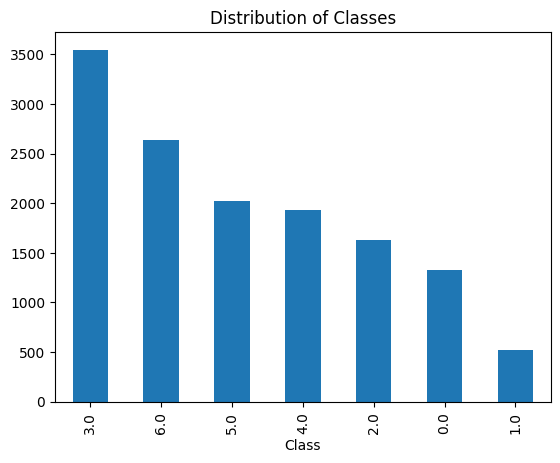

In [ ]:
from sdv.single_table import CTGANSynthesizer
from sklearn.preprocessing import StandardScaler as sc
from sklearn.preprocessing import LabelEncoder as lc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas



# Convert X to a Pandas DataFrame before detecting schema
X = pd.DataFrame(X)  # Convert NumPy array 'X' to a Pandas DataFrame

# Scale and encode data if necessary
Scaler = sc()
X_scaled = Scaler.fit_transform(X)  # Store scaled data in a new variable
y_encoded = lc().fit_transform(y)
y_encoded = y_encoded.reshape(-1, 1)

# Create a DataFrame from the scaled and encoded data
Df = pd.DataFrame(np.concatenate([X_scaled, y_encoded], axis=1), columns=list(X.columns) + ['Class']) # Assuming 'target' is the name of your target column

from collections import Counter
counter = Counter(Df['Class'])
counter

# distribution of the two classes
Df['Class'].value_counts().plot(kind='bar', title='Distribution of Classes')
plt.show()

# Knn, SVM, Decission **Tree**

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       400
         1.0       1.00      1.00      1.00       165
         2.0       0.94      0.95      0.94       491
         3.0       0.90      0.93      0.92      1053
         4.0       0.95      0.96      0.96       559
         5.0       0.95      0.95      0.95       604
         6.0       0.88      0.85      0.87       812

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.92      0.93      0.92      4084

[[0.92       0.         0.0575     0.         0.0025     0.01
  0.01      ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.02851324 0.         0.95315682 0.         0.01221996 0.
  0.00610998]
 [0.         0.         0.         0.9325736  0.002849   0.01329535
  0.05128205]
 [0.         0.         0.00894454 0.00536673 0.95706619 0.

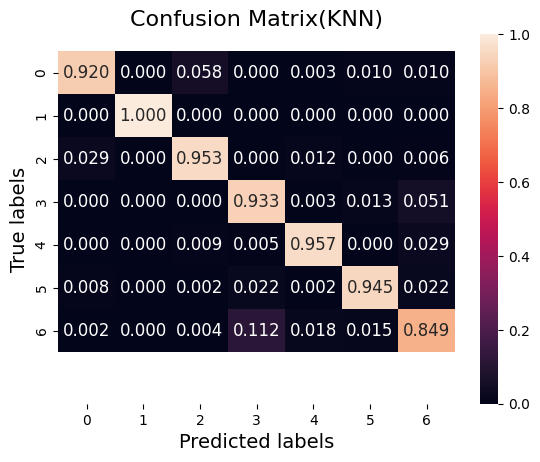

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
data = Df # Replace with your dataset file path


# Select the target class ("management" column) and features (PCA components)
X = Df.iloc[:, :-1]  # Features
y = Df['Class']  # Assuming "management" is the name of the column

# Split the dataset into training and testing sets
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

# Step 4: Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors (k)
knn.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate the Model
y_pred = knn.predict(X_test)

# Step 7: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.title("Confusion Matrix(KNN)", fontsize=16)
plt.show()

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1029
           1       1.00      0.99      0.99       653
           2       0.85      0.86      0.85      1126
           3       0.87      0.88      0.88      1063
           4       0.95      0.96      0.95      1219
           5       0.96      0.95      0.95      1301
           6       0.89      0.87      0.88      1487

    accuracy                           0.90      7878
   macro avg       0.91      0.91      0.91      7878
weighted avg       0.90      0.90      0.90      7878

[[8.32847425e-01 0.00000000e+00 1.45772595e-01 9.71817298e-04
  9.71817298e-03 2.91545190e-03 7.77453839e-03]
 [1.53139357e-03 9.89280245e-01 4.59418070e-03 0.00000000e+00
  1.53139357e-03 1.53139357e-03 1.53139357e-03]
 [1.13676732e-01 1.77619893e-03 8.61456483e-01 0.00000000e+00
  1.77619893e-02 8.88099467e-04 4.44049734e-03]
 [0.00000000e+00 0.00000000e+00 0.0

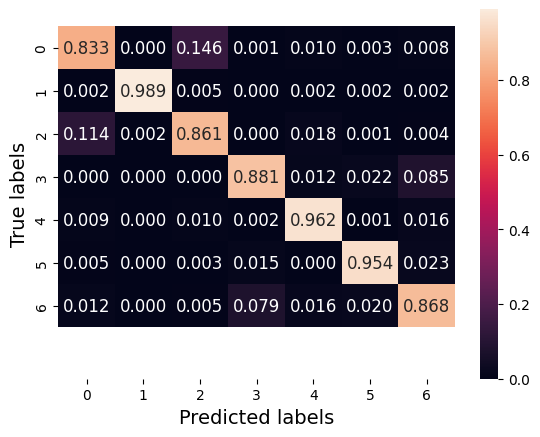

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1029
           1       1.00      0.99      0.99       653
           2       0.85      0.86      0.85      1126
           3       0.87      0.88      0.88      1063
           4       0.95      0.96      0.95      1219
           5       0.96      0.95      0.95      1301
           6       0.89      0.87      0.88      1487

    accuracy                           0.90      7878
   macro avg       0.91      0.91      0.91      7878
weighted avg       0.90      0.90      0.90      7878

[[8.32847425e-01 0.00000000e+00 1.45772595e-01 9.71817298e-04
  9.71817298e-03 2.91545190e-03 7.77453839e-03]
 [1.53139357e-03 9.89280245e-01 4.59418070e-03 0.00000000e+00
  1.53139357e-03 1.53139357e-03 1.53139357e-03]
 [1.13676732e-01 1.77619893e-03 8.61456483e-01 0.00000000e+00
  1.77619893e-02 8.88099467e-04 4.44049734e-03]
 [0.00000000e+00 0.00000000e+00 0.0

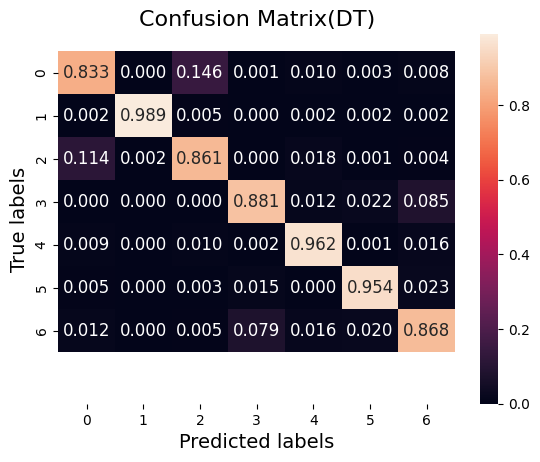

In [37]:
from sklearn.tree import DecisionTreeClassifier as dtree
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

# Create and train the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt=".3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.show()


# Create and train the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)

plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.title("Confusion Matrix(DT)", fontsize=16)
plt.show()

Accuracy: 0.930460333006856
[[0.92       0.         0.055      0.         0.0075     0.01
  0.0075    ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.02443992 0.         0.9592668  0.         0.01221996 0.
  0.00407332]
 [0.         0.         0.         0.93067426 0.         0.01804368
  0.05128205]
 [0.         0.         0.00894454 0.01252236 0.95527728 0.
  0.02325581]
 [0.00662252 0.         0.         0.01490066 0.00165563 0.95529801
  0.02152318]
 [0.00123153 0.         0.         0.10098522 0.01847291 0.01108374
  0.8682266 ]]
          0    1         2         3         4         5         6
0  0.920000  0.0  0.055000  0.000000  0.007500  0.010000  0.007500
1  0.000000  1.0  0.000000  0.000000  0.000000  0.000000  0.000000
2  0.024440  0.0  0.959267  0.000000  0.012220  0.000000  0.004073
3  0.000000  0.0  0.000000  0.930674  0.000000  0.018044  0.051282
4  0.000000  0.0  0.008945  0.012522  0.955277  0.000000  0.023256
5  0.006623  0.0  0.00000

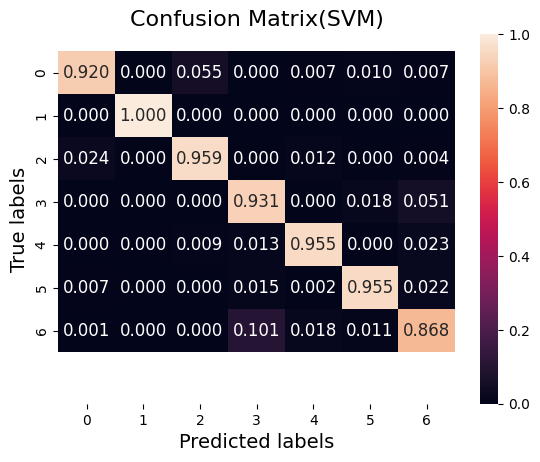

In [ ]:
from sklearn import svm

# Split the dataset into training and testing sets
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    clf = svm.SVC(kernel='rbf') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.title("Confusion Matrix(SVM)", fontsize=16)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.show()

In [ ]:
#Get metadata from the DataFrame *before* initializing the synthesizer
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(Df)

# Initialize the synthesizer *with* the metadata
synthesizer = CTGANSynthesizer(metadata) # Initialize with metadata

# Now you can fit the synthesizer to your data
synthesizer.fit(Df) # Fit using the DataFrame 'Df'
synthetic_data = synthesizer.sample(num_rows=15000)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
synthetic_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.162584,-0.152152,-0.380032,-0.408460,-0.761067,0.091829,-0.372004,-0.228423,0.286533,0.802361,0.673850,0.142934,0.384288,-0.176484,0.009496,0.704161,6.0
1,0.721419,0.741044,0.667905,0.675595,0.526656,0.230574,0.530699,0.614769,-0.821845,-1.388204,-0.565760,-0.731936,-0.938256,-1.231456,-0.787856,0.210280,0.0
2,0.705415,0.623298,0.823164,0.710443,0.300714,0.315224,0.553088,0.797942,1.625267,-2.154517,0.160151,-0.355455,-1.045470,-1.219708,-0.365226,-0.164903,2.0
3,-0.170915,-0.160393,-1.096049,-0.249913,-1.552896,-2.584044,-0.630417,-0.394035,-0.008900,1.202596,1.458040,1.684319,0.148996,1.726096,1.785344,0.551391,5.0
4,-0.276492,-0.187813,-0.284283,-0.008753,-0.635899,0.329793,-0.557704,0.157173,1.432087,0.304995,-0.142766,-0.221855,1.072429,-0.290283,-0.322935,0.771805,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,4.387441,3.630608,2.825810,3.404587,-0.097832,0.529028,4.353377,3.372287,1.056234,-0.668820,-0.258443,0.572793,-2.716244,-1.580978,-0.810123,-0.406362,1.0
14996,-0.554984,-1.026935,-0.331474,-0.680570,-0.375063,0.043959,-0.548912,-0.433801,0.550280,0.216174,0.904568,0.325629,1.641424,0.663099,0.952161,0.048885,3.0
14997,5.487746,3.179327,3.940969,4.166064,0.537611,-0.145251,4.003586,4.044480,1.571418,-0.749586,0.103840,-0.565231,-2.773582,-1.895304,-0.542924,-1.299113,1.0
14998,0.797889,0.715662,0.878115,1.434977,2.254461,0.281309,0.366513,0.801907,0.526963,0.128832,-0.156266,-0.252283,-0.576934,-0.668205,-0.520916,-0.668830,0.0


In [ ]:
synthetic_data = pd.DataFrame(synthetic_data)
from collections import Counter
counter = Counter(synthetic_data['Class'])
df2 = synthetic_data[synthetic_data['Class'] !=3.0]
df = pd.concat([Df, df2], axis = 0)

In [ ]:
Null = df.isnull().sum()
Null
df.to_excel('Ctgan_synthetics_2.xlsx', index= False)
counter= Counter(df['Class'])
counter

Counter({5.0: 4240,
         0.0: 3423,
         1.0: 2323,
         2.0: 3709,
         4.0: 4105,
         6.0: 4912,
         3.0: 3546})

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1029
           1       1.00      1.00      1.00       653
           2       0.87      0.92      0.90      1126
           3       0.87      0.92      0.89      1063
           4       0.98      0.97      0.97      1219
           5       0.98      0.96      0.97      1301
           6       0.91      0.90      0.90      1487

    accuracy                           0.93      7878
   macro avg       0.93      0.93      0.93      7878
weighted avg       0.93      0.93      0.93      7878

[[8.52283771e-01 0.00000000e+00 1.31195335e-01 0.00000000e+00
  9.71817298e-04 2.91545190e-03 1.26336249e-02]
 [0.00000000e+00 9.95405819e-01 4.59418070e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.83836590e-02 0.00000000e+00 9.20959147e-01 0.00000000e+00
  5.32859680e-03 0.00000000e+00 5.32859680e-03]
 [0.00000000e+00 0.00000000e+00 0.0

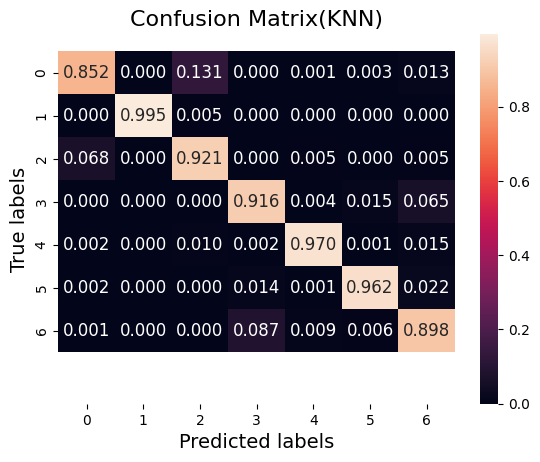

Accuracy: 0.9336125920284336
[[8.74635569e-01 0.00000000e+00 1.08843537e-01 0.00000000e+00
  2.91545190e-03 1.94363460e-03 1.16618076e-02]
 [0.00000000e+00 9.98468606e-01 1.53139357e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.92717584e-02 8.88099467e-04 9.13854352e-01 0.00000000e+00
  8.88099467e-03 0.00000000e+00 7.10479574e-03]
 [9.40733772e-04 0.00000000e+00 0.00000000e+00 8.96519285e-01
  1.88146754e-03 1.88146754e-02 8.18438382e-02]
 [8.20344545e-04 0.00000000e+00 4.92206727e-03 4.10172272e-03
  9.77850697e-01 8.20344545e-04 1.14848236e-02]
 [2.30591852e-03 7.68639508e-04 0.00000000e+00 1.22982321e-02
  0.00000000e+00 9.65411222e-01 1.92159877e-02]
 [2.01748487e-03 0.00000000e+00 0.00000000e+00 6.05245461e-02
  8.74243443e-03 5.37995965e-03 9.23335575e-01]]
          0         1         2         3         4         5         6
0  0.874636  0.000000  0.108844  0.000000  0.002915  0.001944  0.011662
1  0.000000  0.998469  0.001531  0.000000  0.000000  0.0

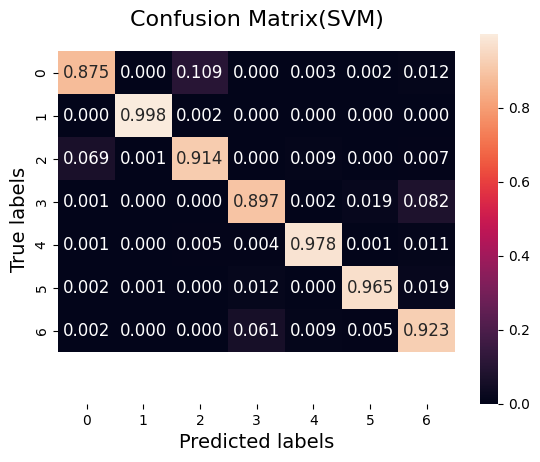

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1029
           1       1.00      0.99      0.99       653
           2       0.85      0.86      0.86      1126
           3       0.86      0.88      0.87      1063
           4       0.96      0.96      0.96      1219
           5       0.96      0.95      0.95      1301
           6       0.89      0.87      0.88      1487

    accuracy                           0.90      7878
   macro avg       0.91      0.91      0.91      7878
weighted avg       0.90      0.90      0.90      7878



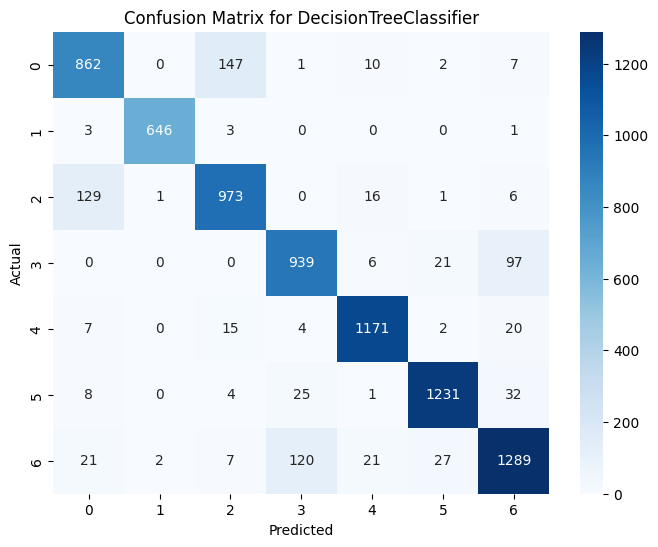

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1029
           1       1.00      1.00      1.00       653
           2       0.90      0.91      0.91      1126
           3       0.90      0.90      0.90      1063
           4       0.98      0.98      0.98      1219
           5       0.98      0.97      0.97      1301
           6       0.90      0.92      0.91      1487

    accuracy                           0.93      7878
   macro avg       0.94      0.94      0.94      7878
weighted avg       0.93      0.93      0.93      7878



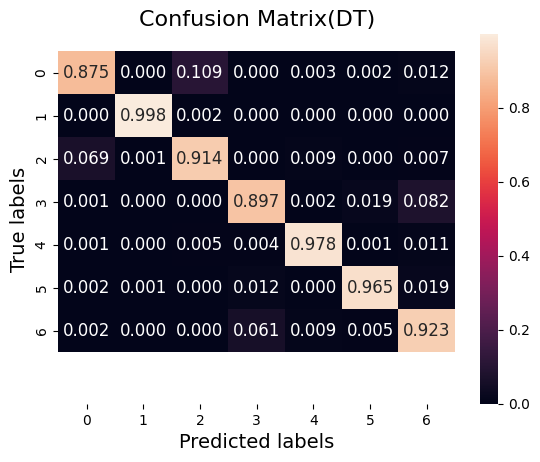

In [35]:
# prompt: Give me code to knn svm and Decision Tree with confusion matrix on above excel file

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('Ctgan_synthetics_2.xlsx')

# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the dataset into training and testing sets
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

# Step 5: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors (k)
knn.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate the Model
y_pred = knn.predict(X_test)

# Step 7: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.title("Confusion Matrix(KNN)", fontsize=16)
plt.show()
# Initialize and evaluate SVM
# Split the dataset into training and testing sets
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)


#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.title("Confusion Matrix(SVM)", fontsize=16)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.show()

# Initialize and evaluate Decision Tree
dt = DecisionTreeClassifier()
train_and_evaluate(dt, X_train, y_train, X_test, y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.title("Confusion Matrix(DT)", fontsize=16)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.show()
